## Import

In [41]:
import uproot as up
from cycler import cycler
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np
import os
import hist
plt.style.use(hep.style.CMS)

## Define common variables

In [42]:
processes = ['genbb', 'genb', 'gencc', 'genc',  'genother']

processNames = {
    'genb': r'QCD-$\mu$ (b)',
    'genbb': r'QCD-$\mu$ ($b\bar{b}$)',
    'genc': r'QCD-$\mu$ (c)',
    'gencc': r'QCD-$\mu$ ($c\bar{c}$)',
    'genother': r'QCD-$\mu$ (l)',
}

colorDict = {
    'genbb': '#fffaff', 
    'genb': '#ffccff',
    'gencc': '#ff91ff',
    'genc': '#ff47ff',
    'genother': '#a879a8',
}

## Define useful function

In [62]:
def plot_postfit(f, year, category, processes, saveplot=False):
    
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(10,10), 
                                  gridspec_kw=dict(height_ratios=[3, 1], hspace=0.07), sharex=True)
    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.3}
    ax.set_ylabel('Events/GeV', fontsize=15)
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    #ax.set_yscale('log')
    hep.cms.label(ax=ax, loc=0,llabel='Preliminary', lumi=lumi, year=year, fontsize=15)

    preidx = 'svmass'+year+category+'pt0_prefit'
    postidx = 'svmass'+year+category+'pt0_postfit'

    predir = f[preidx]
    postdir = f[postidx]
    edges = postdir['TotalBkg'].edges

    process_bin = []
    colors=[]
    mc_list = []

    sum_prefit = np.zeros(len(edges)-1)
    sum_postfit = np.zeros(len(edges)-1)
    sum_postfit_variance = np.zeros(len(edges)-1)

    for process in processes:
        prebin = predir[process].values
        postbin = postdir[process].values
        postfit_bin_variance = np.minimum(postbin, postdir[process].variances)
        process_bin.append(postbin)
        sum_prefit += prebin
        sum_postfit += postbin
        sum_postfit_variance += postfit_bin_variance
        colors.append(colorDict[process])
        mc_list.append(processNames[process])

    colors.reverse()
    ax.set_prop_cycle(cycler(color=colors))

    ### Call data ###
    data = postdir['data_obs'].values
    hep.histplot(data, edges, ax=ax, histtype='errorbar', label="Data", color='k')
    hep.histplot(sum_prefit, edges, ax=ax, label=["SM total (pre-fit)"], color='r', 
                 linestyle='dashed', linewidth=2)
    hep.histplot(sum_postfit, edges, ax=ax, label=["SM total (post-fit)"], color='b', linewidth=3)
    hep.histplot(process_bin, edges, ax=ax, stack=True, 
                     histtype='fill', edgecolor = 'k', linewidth=1, label=mc_list)

    y1 = sum_postfit - np.sqrt(sum_postfit_variance)
    y1 = np.append(y1, 0)
    y2 = sum_postfit + np.sqrt(sum_postfit_variance)
    y2 = np.append(y2, 0)
    ax.fill_between(
        x = edges,
        y1 = y1,
        y2 = y2,
        step = 'post',
        **errps, label='Unc.'
    )
    
    handles, labels = ax.get_legend_handles_labels()
    order = [8,0,1,2,3,4,5,6,7]
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                loc='upper right', fontsize=12, ncol=2) 

    ### Drawing in ratio axes ###
    hep.histplot(data/sum_prefit, edges, yerr=np.sqrt(data)/sum_prefit, ax=rax, histtype='errorbar', 
                 color='r', capsize=4, label="Prefit")
    hep.histplot(data/sum_postfit, edges, yerr=np.sqrt(data)/sum_postfit, ax=rax, histtype='errorbar', 
                 color='b', capsize=4, label="Postfit")

    y1 = 1.- np.sqrt(sum_postfit_variance)/sum_postfit_variance
    y1 = np.append(y1, 0)
    y2 = 1.+ np.sqrt(sum_postfit_variance)/sum_postfit_variance
    y2 = np.append(y2, 0)

    rax.fill_between(
        x = edges,
        y1 = y1,
        y2 = y2,
        step='post',
       **errps, label='Bkg Uncs.'
    )

    ax.set_ylim(0, ax.get_ylim()[1]*1.4)
    ax.text(s='AK15 Jet $p_T$ $\in$ [350, 400)', y=ax.get_ylim()[1]*0.9, x=-1.1, fontsize=15)
    ax.set_xlim(-1.2, 5.2)
    
    rax.axhline(1, ls='--', color='k')
    #rax.set_ylim(-1.2, 5.2)
    rax.set_xlabel(r'log($m(\sum_{i} SV_{i,corr})$/GeV)', fontsize=15)
    rax.set_ylabel('Obs/Exp', fontsize=15)#, loc='center')
    handles, labels = rax.get_legend_handles_labels()
    order = [1,2,0]
    rax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
               loc='upper right', fontsize=12, ncol=3) 
    
    os.system('mkdir -p ../plots/doublesf/postfit/'+year+'/')
    plot_path = os.path.abspath('../plots/doublesf/postfit/'+year+'/')
    plot_name = category+year+'_svmass.png'
    
    if saveplot:
        fig.savefig(os.path.join(plot_path, plot_name))

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


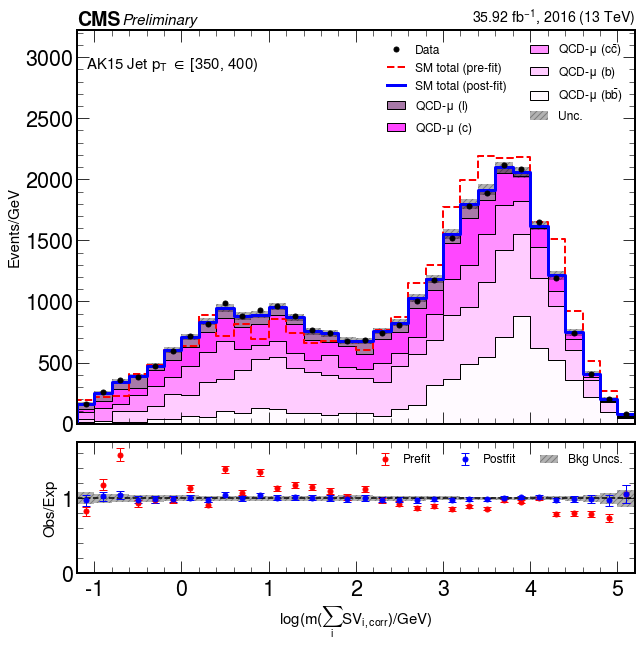

In [63]:
## year, category
year = '2016'
category = 'pass'
lumis = { #Values from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable                                                      
        '2016': "35.92",
        '2017': "41.53",
        '2018': "59.74"
    }
lumi=lumis[year]
saveplot = False
f = up.open("../hists/doublebsf"+year+".postfit")

plot_postfit(f, year, category, processes, saveplot)

In [33]:
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save
import mplhep as hep
import matplotlib.pyplot as plt
import copy
import numpy as np
plt.style.use(hep.style.CMS)

year = '2016'
lumis = { #Values from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable                                                      
        '2016': "36.31",
        '2017': "41.53",
        '2018': "59.74"
    }
lumi=lumis[year]

hists = load('../hists/doublebsf'+year+'.scaled')
bkg_hists = copy.deepcopy(hists['bkg'])
signal_hists = copy.deepcopy(hists['sig'])
data_hists = copy.deepcopy(hists['data'])
if year == '2018':
    for k in data_hists:
        data_hists[k].scale(2.)

In [34]:
###
# Table
###
sum=0
for p in bkg_hists['ZHbbvsQCD'].identifiers('process'):
    print(p, bkg_hists['ZHbbvsQCD'].integrate('process',str(p)).values()[()].sum())
    sum+=bkg_hists['ZHbbvsQCD'].integrate('process',str(p)).values()[()].sum()
print('Expected',sum)
print('Observed',data_hists['ZHbbvsQCD'].integrate('process').values()[()].sum())

QCD-$\mu$ (bb) 23968.250184770397
QCD-$\mu$ (b) 42936.38333613503
QCD-$\mu$ (cc) 24264.046423750227
QCD-$\mu$ (c) 57297.98063927726
QCD-$\mu$ (l) 93940.20716641223
Expected 242406.86775034515
Observed 242402.0


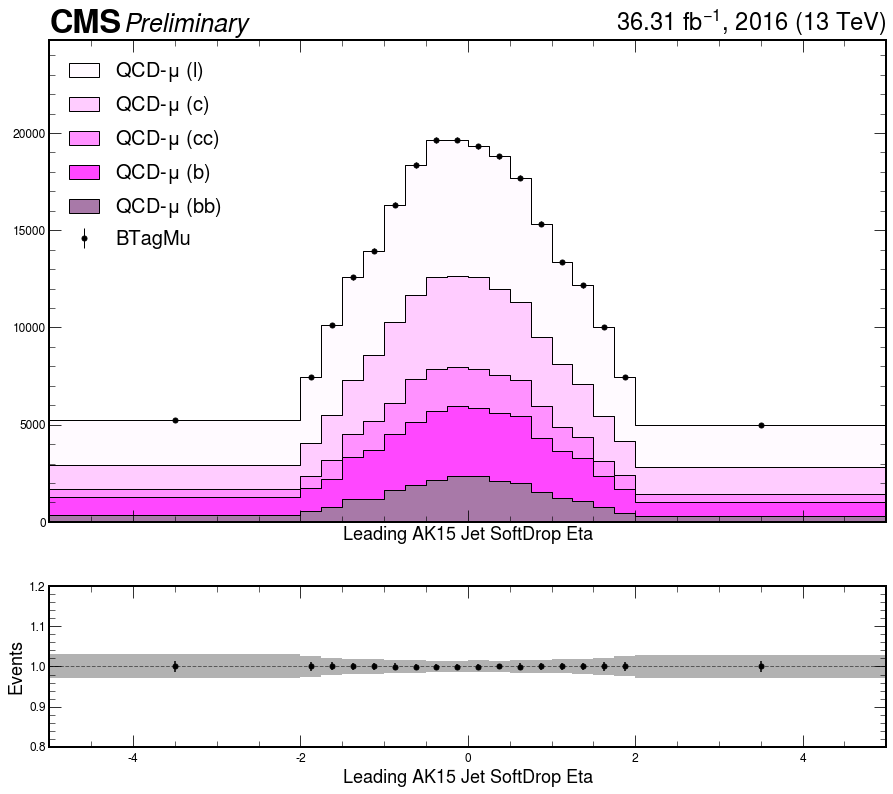

In [37]:
###
# Stack plots
###

from cycler import cycler
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.hist import plot

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#fffaff','#ffccff','#ff91ff','#ff47ff','#a879a8']

variable='fj1eta'

fig, (ax, rax) = plt.subplots(2, 1, figsize=(15,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
ax.set_prop_cycle(cycler(color=colors))

line_opts = {'linestyle':'-', 'linewidth':2}
line_opts2 = {'linestyle':'dashdot', 'linewidth':5}
error_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10.}

bkg_hists_QCD=bkg_hists[variable]
#bkg_hists_QCD=bkg_hists_QCD.sum('tau21','fj1eta','ZHbbvsQCD')#.rebin('fj1pt',hist.Bin('fj1pt', 'fj1pt', [350, 450, 550, 700, 2500]))

plot.plot1d(bkg_hists_QCD,
                overlay="process",
                ax=ax,
                #error_opts=error_opts,
                clear=False,
                line_opts=line_opts,
                stack=True,
                fill_opts=fill_opts,
                )
data_hists_QCD=data_hists[variable]
#data_hists_QCD=data_hists_QCD.sum('tau21','fj1eta','ZHbbvsQCD').integrate('process','BTagMu')#.rebin('fj1pt',hist.Bin('fj1pt', 'fj1pt', [350, 450, 550, 700, 2500]))

plot.plot1d(data_hists_QCD,            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
            )

plot.plotratio(data_hists_QCD.integrate('process'), 
               bkg_hists_QCD.integrate('process'),
               ax=rax,
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
               )
ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
#ax.set_yscale('log')
ax.set_ylabel("",fontsize=25)
ax.set_ylim(.0, ax.get_ylim()[1]*1.2)
#ax.set_xlabel("SV mass",fontsize=25)
#ax.set_xlim(.0, 1.)
rax.set_ylim(0.8,1.2)
leg = ax.legend(ncol=1, loc='upper left',fontsize=20)
hep.cms.text(ax=ax, loc=0, text='Preliminary',fontsize=25)
hep.cms.lumitext(ax=ax, text=lumi+r" fb$^{-1}$, "+year+" (13 TeV)",fontsize=25)

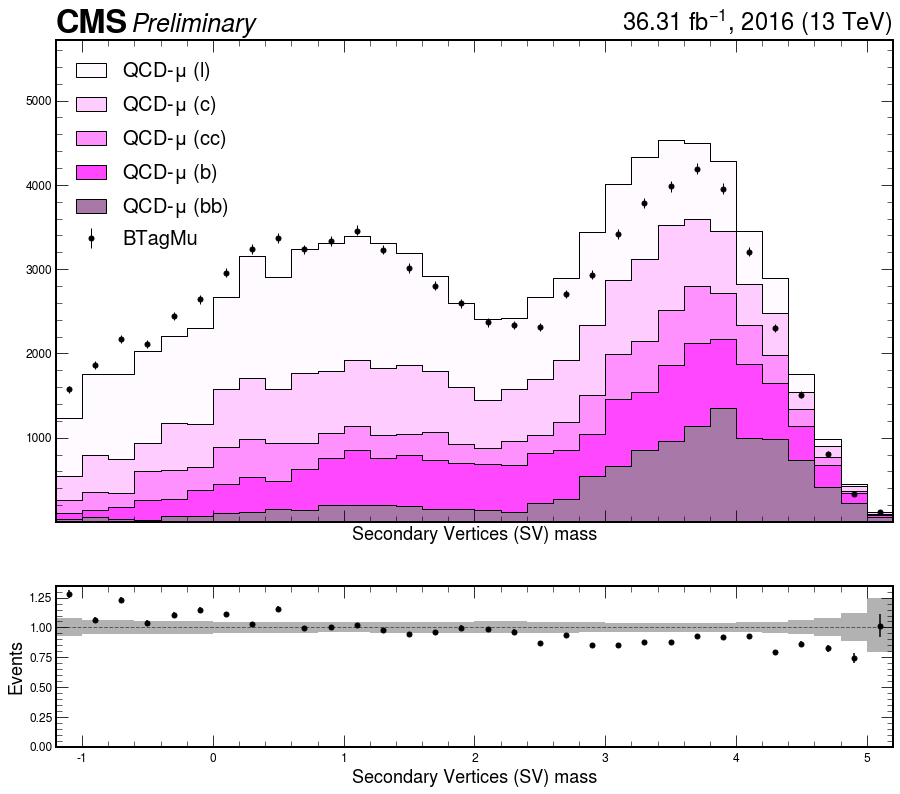

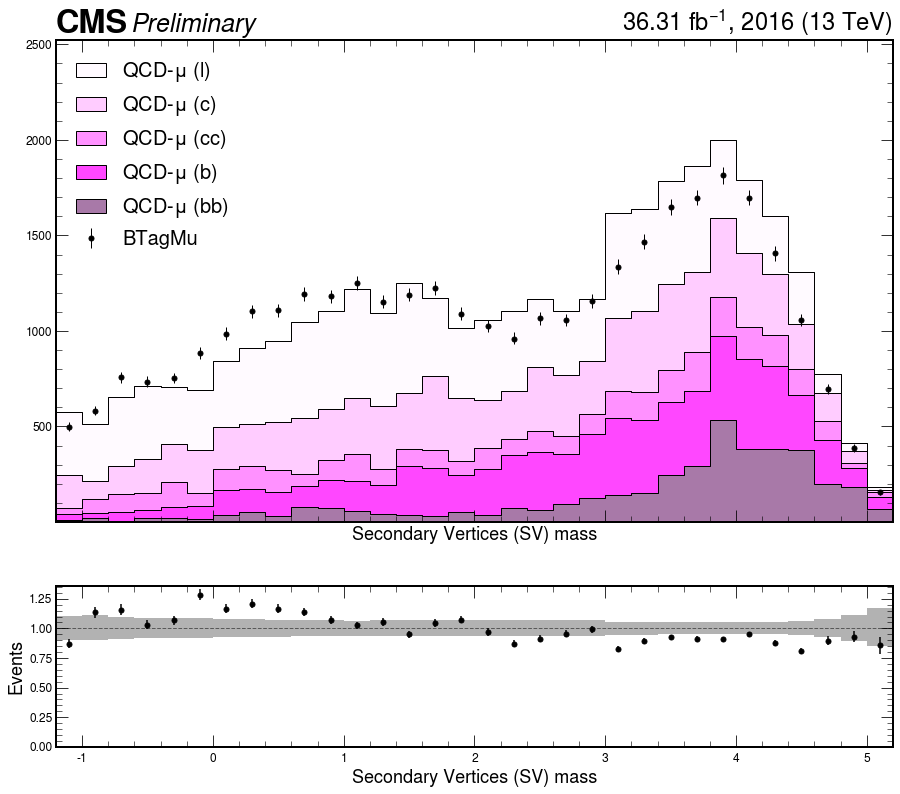

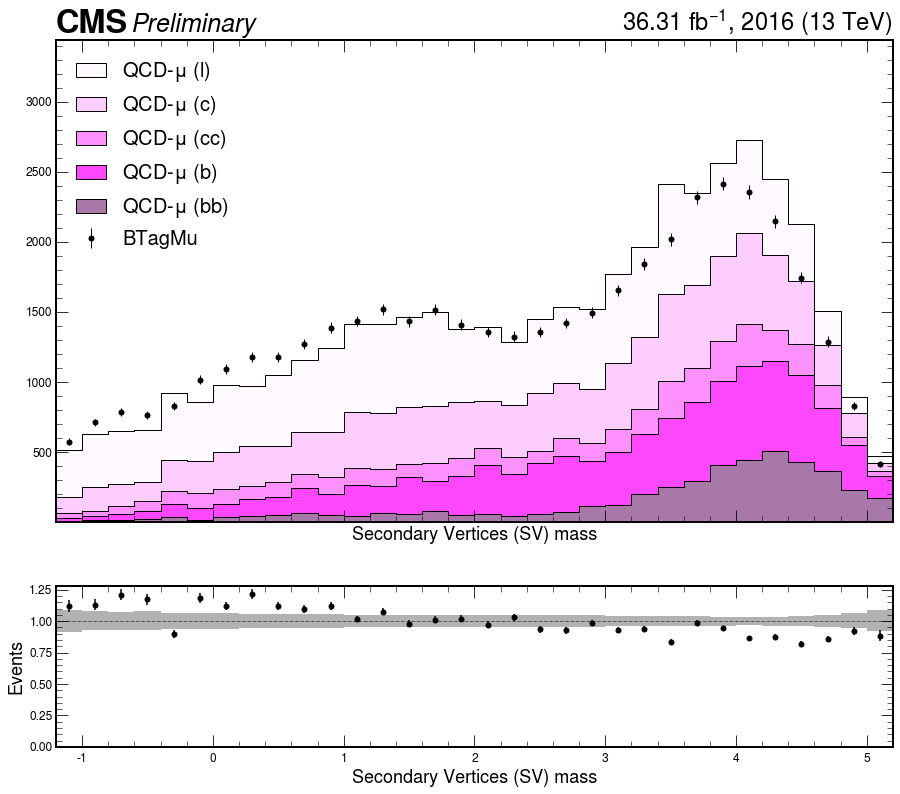

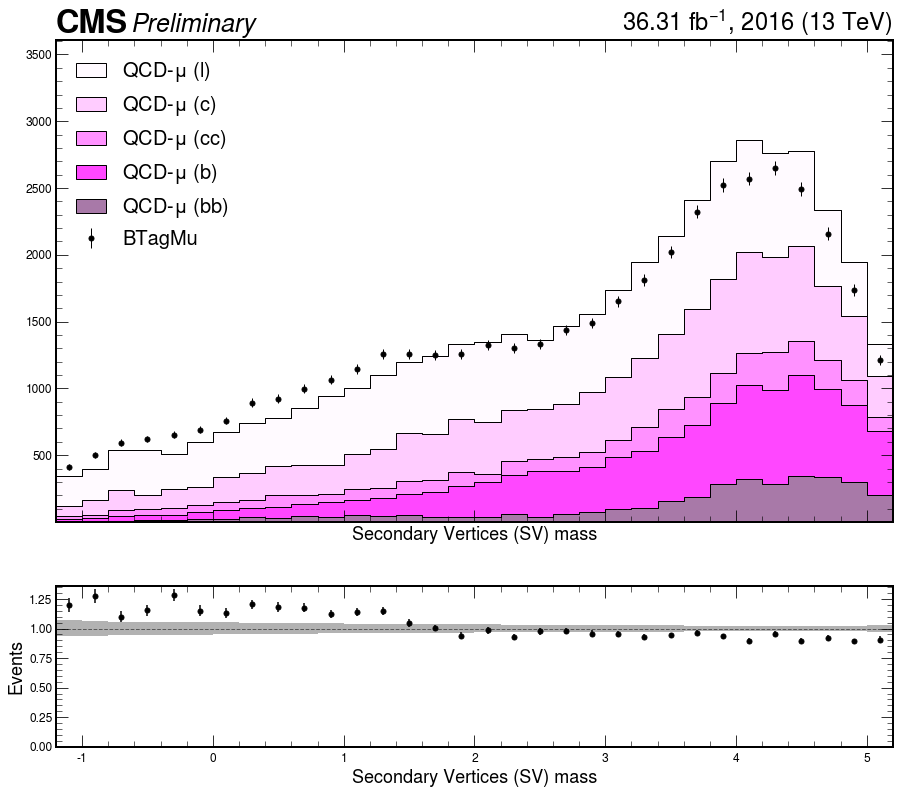

In [38]:
###
# Stack plot of SV mass
###

from cycler import cycler
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.hist import plot

#pt_binning=[[350, 400],[400, 450], [450, 500], [500, 600], [600, 900], [900, 2500]]
pt_binning=[[350, 450],[450, 500], [500, 600], [600, 2500]]
#pt_binning=[[350, 400],[400, 450], [450, 2500]]

def plot_svmass(bin_index):
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#fffaff','#ffccff','#ff91ff','#ff47ff','#a879a8']


    fig, (ax, rax) = plt.subplots(2, 1, figsize=(15,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    ax.set_prop_cycle(cycler(color=colors))

    line_opts = {'linestyle':'-', 'linewidth':2}
    line_opts2 = {'linestyle':'dashdot', 'linewidth':5}
    error_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10.}

    bkg_hists_QCD=bkg_hists['template']
    bkg_hists_QCD=bkg_hists_QCD.rebin('fj1pt',hist.Bin('fj1pt', 'fj1pt', pt_binning[bin_index]))
    bkg_hists_QCD=bkg_hists_QCD.sum('fj1pt','ZHbbvsQCD')
    

    plot.plot1d(bkg_hists_QCD,
                    overlay="process",
                    ax=ax,
                    #error_opts=error_opts,
                    clear=False,
                    line_opts=line_opts,
                    stack=True,
                    fill_opts=fill_opts,
                    )
    data_hists_QCD=data_hists['template']#.rebin('svmass',hist.Bin('svmass','SV mass', [-1.2, -0.8, -0.4, 0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]))
    data_hists_QCD=data_hists_QCD.rebin('fj1pt',hist.Bin('fj1pt', 'fj1pt', pt_binning[bin_index]))
    data_hists_QCD=data_hists_QCD.sum('fj1pt','ZHbbvsQCD')

    plot.plot1d(data_hists_QCD,            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                )

    plot.plotratio(data_hists_QCD.integrate('process'), 
                   bkg_hists_QCD.integrate('process'),
                   ax=rax,
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    #ax.set_yscale('log')
    ax.set_ylabel("",fontsize=25)
    ax.set_ylim(.01, ax.get_ylim()[1]*1.2)
    #ax.set_xlabel("SV mass",fontsize=25)
    #ax.set_xlim(.0, 1.)
    leg = ax.legend(ncol=1, loc='upper left',fontsize=20)
    hep.cms.text(ax=ax, loc=0, text='Preliminary',fontsize=25)
    hep.cms.lumitext(ax=ax, text=lumi+r" fb$^{-1}$, "+year+" (13 TeV)",fontsize=25)

plot_svmass(0)
plot_svmass(1)
plot_svmass(2)
plot_svmass(3)
#plot_svmass(4)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

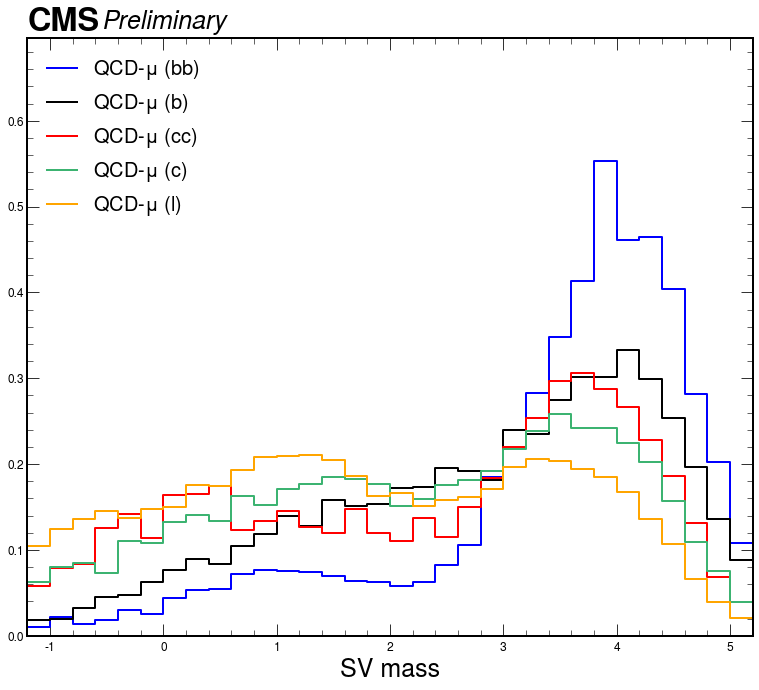

In [39]:
###
# Unstack plot of SV mass
###

from cycler import cycler
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.hist import plot

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#0000ff','#000000','#ff0000','#3cb371','#FFA500','#cccccc']


fig, ax = plt.subplots(figsize=(13,11), sharex=True)
ax.set_prop_cycle(cycler(color=colors))

line_opts = {'linestyle':'-', 'linewidth':2}
line_opts2 = {'linestyle':'dashdot', 'linewidth':5}
error_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10.}

bkg_hists_QCD=bkg_hists['template']
bkg_hists_QCD=bkg_hists_QCD.sum('fj1pt','ZHbbvsQCD')

plot.plot1d(bkg_hists_QCD,
                overlay="process",
                ax=ax,
                #error_opts=error_opts,
                clear=False,
                density=True,
                line_opts=line_opts,
                )


ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
#ax.set_yscale('log')
ax.set_ylabel("",fontsize=25)
ax.set_ylim(.0, ax.get_ylim()[1]*1.2)
ax.set_xlabel("SV mass",fontsize=25)
#ax.set_xlim(.0, 1.)
leg = ax.legend(ncol=1, loc='upper left',fontsize=20)
hep.cms.text(ax=ax, loc=0, text='Preliminary',fontsize=25)

#data_hist=data_hists['template'].integrate('process').integrate('gentype').integrate('svmass')



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

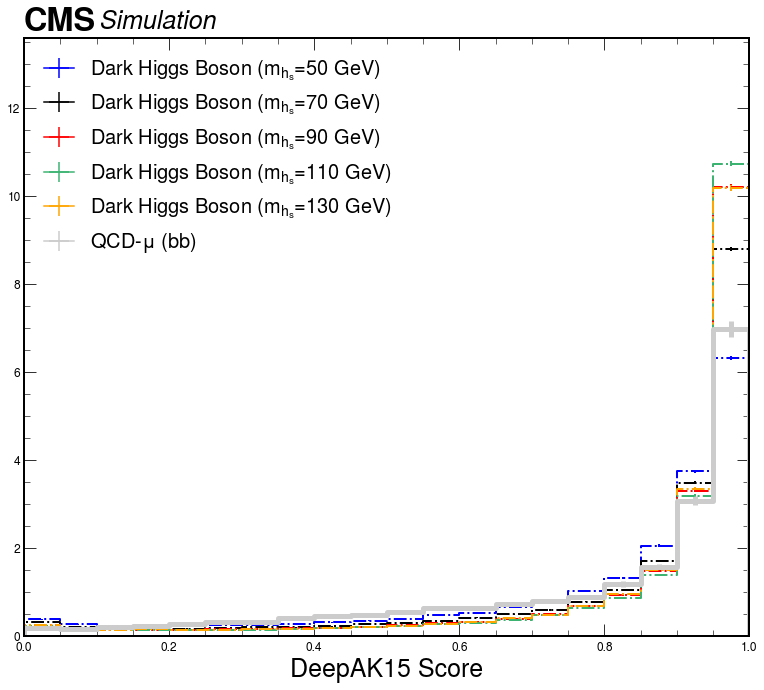

In [40]:
###
# N-1 of the fat jet tagger unstack plot
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.hist import plot

process = hist.Cat("process", "Process", sorting="placement")
cats = ("process",)

bkg_hists_ZHbbvsQCD=bkg_hists['ZHbbvsQCD']
#bkg_hists_ZHbbvsQCD=bkg_hists_ZHbbvsQCD.integrate('process','QCD-$\mu$ (bb)')
bkg_map = OrderedDict()
bkg_map['QCD-$\mu$ (bb)'] = ('QCD-$\mu$ (bb)',)
bkg_hists_ZHbbvsQCD=bkg_hists_ZHbbvsQCD.group(cats, process, bkg_map)

signal_hists_ZHbbvsQCD=signal_hists['ZHbbvsQCD']
signal_map = OrderedDict()
signal_map[r"Dark Higgs Boson ($m_{h_s}$=50 GeV)"] = ("Mz500_mhs50_Mdm150*",)
signal_map[r"Dark Higgs Boson ($m_{h_s}$=70 GeV)"] = ("Mz500_mhs70_Mdm150*",)
signal_map[r"Dark Higgs Boson ($m_{h_s}$=90 GeV)"] = ("Mz500_mhs90_Mdm150*",)
signal_map[r"Dark Higgs Boson ($m_{h_s}$=110 GeV)"] = ("Mz500_mhs110_Mdm150*",)
signal_map[r"Dark Higgs Boson ($m_{h_s}$=130 GeV)"] = ("Mz500_mhs130_Mdm150*",)
signal_hists_ZHbbvsQCD=signal_hists_ZHbbvsQCD.group(cats, process, signal_map)

        
plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#0000ff','#000000','#ff0000','#3cb371','#FFA500','#cccccc']


fig, ax = plt.subplots(figsize=(13,11), sharex=True)
ax.set_prop_cycle(cycler(color=colors))

line_opts = {'linestyle':'dashdot', 'linewidth':2}
line_opts2 = {'linestyle':'-', 'linewidth':5}
error_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10.}


plot.plot1d(signal_hists_ZHbbvsQCD,
                overlay="process",
                ax=ax,
                error_opts=error_opts,
                clear=False,
                density=True,
                line_opts=line_opts,
                )

plot.plot1d(bkg_hists_ZHbbvsQCD,
                #overlay="process",
                ax=ax,
                error_opts=error_opts,
                clear=False,
                density=True,
                line_opts=line_opts2,
                )

ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
#ax.set_yscale('log')
ax.set_ylabel("",fontsize=25)
ax.set_ylim(.0, ax.get_ylim()[1]*1.2)
ax.set_xlabel("DeepAK15 Score",fontsize=25)
ax.set_xlim(.0, 1.)
leg = ax.legend(ncol=1, loc='upper left',fontsize=20)
hep.cms.text(ax=ax, loc=0, text='Simulation',fontsize=25)

#coffee = plt.text(0., 1., u"☕ "+'Signal Region', fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
#lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

#os.system('mkdir -p ../plots/darkhiggs/prefit/'+year+'/')
#plot_path = os.path.abspath('../plots/darkhiggs/prefit/'+year+'/') 
#plot_name = 'unstack_sr_ZHbbvsQCD.png'
#fig.savefig(os.path.join(plot_path, plot_name))


